### 单链表的简单实现

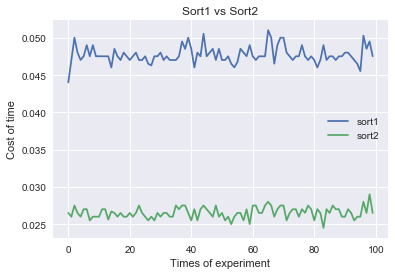

In [2]:
class LNode:
    def __init__(self, elem, next_=None):
        self.elem = elem
        self.next = next_

class LinkedListUnderflow(ValueError):
    pass
        
class LList:
    # 列表初始化
    def __init__(self):
        self._head = None
    
    # 判空
    def is_empty(self):
        return self._head is None
    
    # 在表头增加元素
    def prepend(self, elem):
        self._head = LNode(elem, self._head)
    
    # 弹出表尾元素
    def pop(self):
        if self._head is None:
            raise LinkedListUnderflow("in pop")
        e = self._head.elem
        self._head = self._head.next 
        return 
    
    # 在表尾增加元素
    def append(self, elem):
        if self._head is None:
            self._head = LNode(elem)
            return 
        p = self._head
        while p.next is not None:
            p = p.next
        p.next = LNode(elem)
        
    # 弹出最后一个元素
    def pop_last(self):
        if self._head is None:
            raise LinkedListUnderflow("in pop_last")
        p = self_head
        if p.next is None:
            e = p.elem
            self._head = None
            return e
        while p.next is not None:
            p = p.next
        p.next = LNode(elem)
        
    # 按条件遍历所有元素
    def filter(self, pred):
        p = self._head
        while p is not None:
            if pred(p.elem):
                yield p.elem
            p = p.next
    
    # 打印素有元素
    def printall(self):
        p = self._head
        while p is not None:
            print(p.elem, end="")  # end=""保证结尾不换行
            if p.next is not None:
                print(", ", end="")
            p = p.next
        print("")
    
    # 反向打印所有元素
    def rev(self):
        p = None
        while self._head is not None:
            q = self._head
            self._head = q.next
            q.next  = p
            p = q
        self._head = p
        
    # 排序
    # （1）通过移动表中元素进行内部排序
    def sort01(self):
        if self._head is None:
            reutrn 
        else:
            crt = self._head.next
            while crt is not None:
                x = crt.elem
                p = self._head
                while p is not crt and p.elem <= x:
                    p = p.next
                while p is not crt:
                    y = p.elem
                    p.elem = x
                    x = y
                    p = p.next
                crt.elem = x
                crt = crt.next
    # （2）通过调整节点之间的链接关系进行排序
    def sort02(self):
        p = self._head
        if p is None or p.next is None:
            return 
        rem = p.next
        p.next = None
        while rem is not None:
            p = self._head
            q = None
            while p is not None and p.elem <= rem.elem:
                q = p
                p = p.next
            if q is None:
                self._head = rem
            else:
                q.next = rem
            q = rem
            rem = rem.next
            q.next  = p

######################################################################################
# 测试 #
import numpy as np
import copy
import time
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
if __name__ == "__main__":
    times = 100
    timesort1 = []
    timesort2 = []
    for j in range(times):
        mlist1 = LList()
        mlist2 = LList()
        for i in np.random.randint(1,100000, 1000):
            mlist1.append(i)
            mlist2.append(i)
        start = time.time()
        mlist1.sort01()
        end = time.time()
        timesort1.append(end - start)
        
        start = time.time()
        mlist2.sort02()
        end = time.time()
        timesort2.append(end - start)
plt.figure()
plt.title("Sort1 vs Sort2")
plt.plot(range(times), timesort1, label="sort1")
plt.plot(range(times), timesort2, label="sort2")
plt.ylabel("Cost of time")
plt.xlabel("Times of experiment")
plt.legend()
plt.show()
# 从下图可以看出两种算法的性能不一样，仔细研究下差别到底产生在哪

### 通过继承并修改实现链表需求

In [4]:
class LList1(LList):
    def __init__(self):
        LList.__init__(self)        ## 弄懂关键字super这里为什么不能用？
        self._rear = None
        
    def prepend(self, elem):
        if self._head is None:
            self._head = LNode(elem, self._head)
            self._rear = self._head
        else:
            self._rear.next = LNode(elem)
            self._rear = self._rear.next
            
    def pop_last(self):
        if self._head is None:
            raise LinkedListUnderflow("in pop_last")
        p = self._head
        if p.next is None:
            e = p.elem
            self._head = None
            return e
        while p.next.next is not None:
            p = p.next
        e = p.elem
        p.next = None
        self._rear = p
        return e

In [5]:
mlist1 = LList1()
mlist1.prepend(99)
for i in range(11, 20):
    mlist1.append(i)
for x in mlist1.filter(lambda y: y % 2 == 0):
    print(x)

12
14
16
18


### 单循环链表

In [6]:
class LCList:
    def __init__(self):
        self._rear = None
    
    def is_empty(self):
        return self._rear is None
        
    def prepend(self, elem):
        p = LNode(elem)
        if self.is_empty():
            p.next = p
            self._rear = p
        else:
            p.next = self._rear.next
            self._rear.next = p
    
    def append(self, elem):
        self.prepend(elem)       # 直接在前端插入的基础上修改，其实前端插入和尾部插
                                   #入原理差不多，只是末尾指针的变化
        self._rear = self._rear.next
        
    def pop(self):
        if self._rear is None:
            raise LinkedListUnderflow("in pop of CLList")
        p = self._rear.next
        if self._rear is p:
            self._rear = None
        else:
            self._rear.next = p.next
        return p.elem
    
    def printall(self):                ## 主要是指针的使用，所以具有指针的语言如C和C++更能锻炼编程能力
        if self.is_empty():
            return 
        p = self._rear.next
        while True:
            print(p.elem)
            if p is self._rear:
                break
            p = p.next
            

### 双链表

In [7]:
class DLNode(LNode):    # 通过继承将单链表扩展成双链表
    def __init__(self, elem, prev=None, next_=None):
        LNode.__init__(self, elem, next_)
        self.prev = prev

In [8]:
# 带有尾结点引用的双链表
class DLList(LList1):    # 通过继承实现需求
    def __init__(self):
        LList1.__init__(self)
        
    def prepend(self, elem):
        p = DLNode(elem, None, self._head)
        if self._head is None:
            self._rear = p
        else:
            p.next.prev = p
        self._head = p
    
    def append(self, elem):
        p = DLNode(elem, self._rear, None)
        if self._head is None:
            self._head = p
        else:
            p.prev.next = p
        self._rear = p
        
    def pop(self):
        if self._head is None:
            raise LinkedListUnderflow("in pop of DLList")
        else:
            e = self._head.elem
            # self._head.next.prev 注意指针调换的顺序问题
            self._head = self._head.next
            self._head.prev = None
            return e
    
    def pop_last(self):
        if self._head is None:
            raise LinkedListUnderflow("in pop_las of DLList")
        else:
            e = self._rear.elem
            self._rear = self._rear.next  # 先设置prev引用，可以顺带将尾指针设为空
            if self._rear is None:
                self._head = None
            else:
                self._rear.next = None
            return e
# 自己设计
#             e = self._rear.elem
#             if self._head == self._rear:  # 只有一个元素时
#                 self._head = None
#                 self._rear = None
#             else:
#                 self._rear = self._rear.prev
#                 self._rear.next = None
#             return e